In [11]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

# Data Wrangling And Reading Data

In [12]:
df=pd.read_csv(r'Dataset No_show.csv') #load dataset anto a dataframe

In [13]:
df.head() #shows the first 5 rows of data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [15]:
sum(df.duplicated()) # There are no duplicate rows in this dataset.

0

In [16]:
df.describe() #get statistical data about each column

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- The age column has one or more negative values that must be removed

>- We have ages from -1 to 115, so we have a wide range of ages to investigate.

>- In the gender column, there are two values, F, M, while the most common is the value F, so it turns out that women are more than men

>- "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", and "SMS_received" are encoded in form of zeros and ones, thats why it has type of int64, and appears like a continous data type.

>- Show up has 2 unique values yes or No and the most frequent one is No which means that most of the patients show up on their appointments.





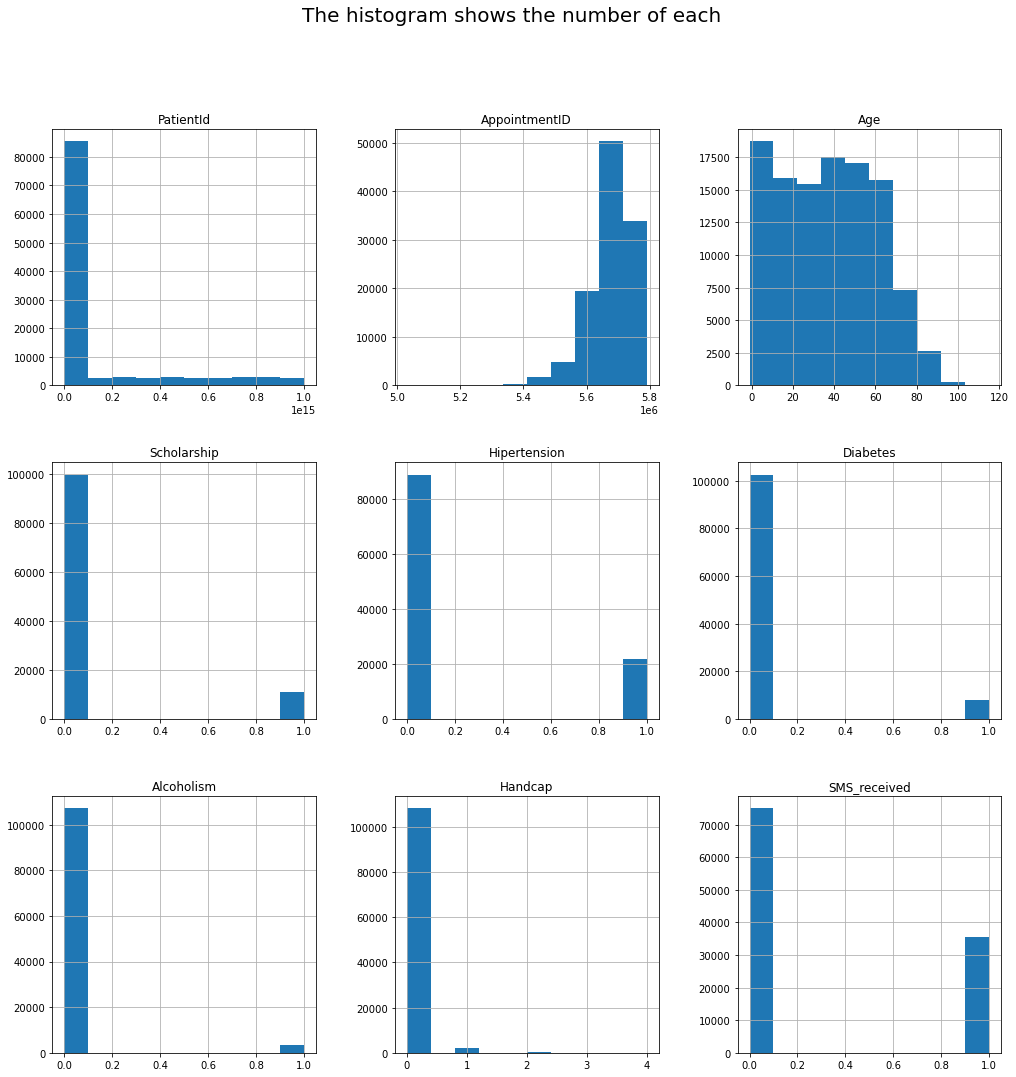

In [17]:
#draw Histogram to show distribution of data for each feature
df.hist(figsize=(17,17))
plt.suptitle('The histogram shows the number of each', fontsize=20);

>- There is understandable data in the following columns: AppointmentId and PatientId, so we need to change their types to strings

>- We notice in the figure that the young tooth is large compared to the old age

>- The percentage of diabetes and the percentage of the grant under the Brazilian care program, the indications are soon that it does not exceed 10%

>- In terms of the proportion of patients with high blood pressure that exceeded 20%, this is very important

>- Percentage of Alcoholism and Handicap is extremely low

>- In terms of the rate of receiving SMS messages, it almost exceeded 35% of those who received messages


# Data Cleaning

# 1- Change the "No Show" values to make it easier to deal with


In [18]:
#We will invert the values in terms of
#-1.. 0 means that the patient did not show up on time
#-2..1 means that the patient came on time
df["No-show"].replace({"Yes":0,"No":1},inplace=True)

In [19]:
#Change the datatype of the column to be an integer, this is just to make sure that I'm specifying the values 0, 1 are actually integers
df['No-show'] = df['No-show'].astype('int64')

In [20]:
df.info() #To make sure the column type has changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


>- After displaying the data, we need to change the data type of the columns “ScheduledDay” and “AppointmentDay” to a data type of dates in order to work with them

In [21]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [22]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [23]:
df.info() #Changed successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [24]:
df['PatientId'] = df['PatientId'].astype(str) #Changed successfully

In [25]:
df['AppointmentID'] = df['AppointmentID'].astype('str') #Changed successfully

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [27]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


>- After looking at the data and determining the age, we notice that there are negative ages, so we must delete the negative columns

In [28]:
df[df['Age'] < 0] #show colmn with this problem

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [29]:
df = df.drop([99832]) #Clear negative values

In [30]:
df['Age'].min() #done successfully

0

# Question 1
What is the percentage of patients who show up on their appointements vs. who don't?

In [31]:
num_no_show = df[df["No-show"]==1].count()["No-show"] #The number of patients who came on time

In [32]:
num_no_show2 = df[df['No-show'] == 0].count()['No-show'] #The number of patients who did not arrive on time

In [33]:
print(num_no_show , num_no_show2)

88207 22319


<function matplotlib.pyplot.show(close=None, block=None)>

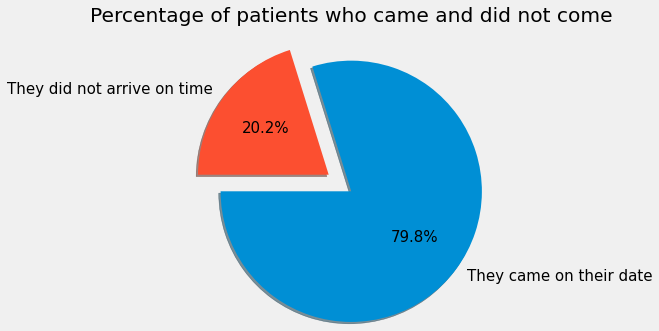

In [34]:
data = [num_no_show,num_no_show2]
label1 = ['They came on their date','They did not arrive on time']

plt.style.use('fivethirtyeight')
plt.axis('equal') #It helps to equalize the circular dimensions
plt.pie(data,labels=label1,radius=1.4,shadow=True,explode=(0,0.3),autopct='%1.1f%%',startangle=180,textprops = {"fontsize":15})
plt.title('Percentage of patients who came and did not come',y=1.2)
plt.show

##### Answer:

>- We will notice the farthest shapes from some of this beautiful shapes using "explode"

>- We will also notice that you choose to have one decimal number appear after the whole number

>- The proportion of patients who came to their appointment is 79.8%

>- Percentage of patients who did not attend their appointment 20.2%


# Question 2
>- Do certain gender has more commitment to medical schedules than the other one?

In [35]:
x = df.groupby(['Gender','No-show']).count()

In [36]:
#It was successfully completed for all the values, but I want to know the number of patients who attended and the number of patients who did not have green
x.head()

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      0            14594          14594         14594           14594  14594   
       1            57245          57245         57245           57245  57245   
M      0             7725           7725          7725            7725   7725   
       1            30962          30962         30962           30962  30962   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      0                14594        14594         14594     14594   
       1                57245        57245         57245     57245   
M      0                 7725         7725          7725      7725   
       1                30962        30962         30962     30962   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      0             14594    14594         14594  
       1             57245    57245         57245  
M      0              7725     7725          7725  
       1             30962    30962         30962

Text(0, 0.5, 'count of patients')

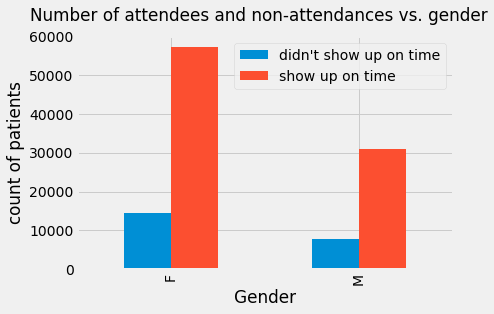

In [37]:
x["PatientId"].unstack().plot(kind='bar',stacked=False,grid=True)
plt.legend(["didn't show up on time",'show up on time']) #Clarify the features of the drawing
plt.suptitle('Number of attendees and non-attendances vs. gender') #a title to paint it
plt.ylabel('count of patients') #Add an address to the y axis

##### Outcomes:

>- We note in the drawing that the attendance rate is high in terms of men and women, especially women more

>- We need to know the comparison between the number of patients and the percentage of attendance or non-attendance

In [38]:
df_male = df[df['Gender'] == 'M'] #Male data separated from gender
df_m_count = df_male['PatientId'].count() #Calculate the number of male data

In [39]:
male_No_show = df_male[df_male['No-show'] == 1] ##new dataframe holds male who showed up only.

In [40]:
count_m_df = male_No_show['No-show'].sum() #count of males who No-show

In [41]:
#calculate percentage of males who attend their appointments among all males in the data
male_data = count_m_df / df_m_count * 100
print(f'Percentage of Males who show up on their appointments is around {male_data:.2f} of all male patients.')

Percentage of Males who show up on their appointments is around 80.03 of all male patients.


Now Let's Repeat same steps with females.

In [42]:
df_females = df[df['Gender'] == 'F']
df_f_count = df_females['PatientId'].count()

In [43]:
females_No_show = df_females[df_females['No-show'] == 1]

In [44]:
count_f_df = females_No_show['No-show'].sum()

In [45]:
count_f_df

57245

In [46]:
females_data = count_f_df / df_f_count * 100
print(f'Percentage of females who show up on their appointments is around {females_data:.2f} of all female patients.')

Percentage of females who show up on their appointments is around 79.69 of all female patients.


#We note that the attendance rate between the sexes is very similar

# Question 3
>- Is the duration between registration and appointment affect the ability to show up 

To answer this question, you will create a new column with the value of the difference between regestiration and appointment

In [47]:
df['time_duration'] = (df.AppointmentDay.dt.date) - (df.ScheduledDay.dt.date) #.dt.date to differ only date part

In [48]:
df['time_duration'] = df.time_duration.dt.days #to convert column to numerical column contain number of days

In [49]:
df.tail() #Show new column

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_duration
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1,35
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1,35
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1,41
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1,41
110526,377511518121127.0,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,1,41


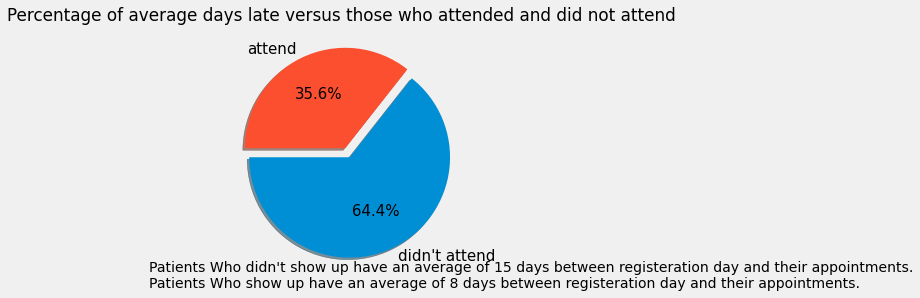

In [50]:
x = df.groupby(['No-show'])['time_duration'].mean()
x.plot(kind='pie',startangle=180,labels=["didn't attend","attend"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,
       textprops={'fontsize':15})
plt.suptitle('Percentage of average days late versus those who attended and did not attend')
plt.ylabel(None)
plt.text(-2,-1.3,"Patients Who didn't show up have an average of 15 days between registeration day and their appointments.\nPatients Who show up have an average of 8 days between registeration day and their appointments.")
plt.axis('equal')
plt.show();

#### Answer:
>- Patients Who didn't show up have an average of 15 days between registeration day and their appointments.
>- Patients Who show up have an average of 8 days between registeration day and their appointments.

>- As Duration increases, the ability of patients to show up on their appointments decreases.

# Question 4 
>- Where is the most appointments take place

In [51]:
df.describe(include="all")

<ipython-input-51-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
<ipython-input-51-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_duration
count,110526,110526,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
unique,62298,110526,2,103548,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,822145925426128.0,5731445,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,88,1,71839,24,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066,10.183794
std,NaN,NaN,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.255034
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


<AxesSubplot:xlabel='Neighbourhood'>

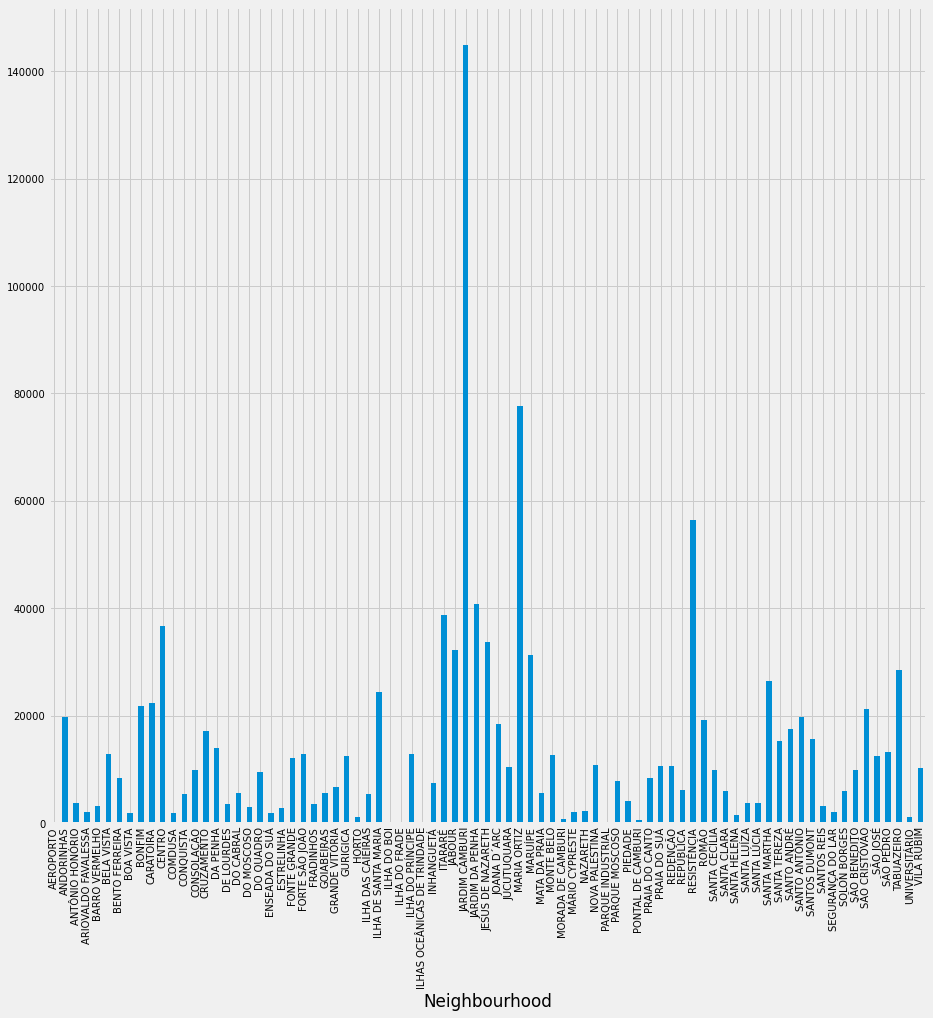

In [52]:
df.groupby(['Neighbourhood'])['time_duration'].sum().plot(kind='bar',figsize=(14,14),fontsize=10)

##### Answer:
>- "JARDIM CAMBURI" is the most frequent place.

# Question 5
What are the ages of the medical table

We want to divide the ages of age to clarify :
>below 18, 18-24, 25-34, 35-44, 45-54, 55-64, more than 65.

In [53]:
def age(data,rows,s1,s2):
    """The state is responsible for dividing the ages in order to evaluate
    itsflag as the best form. The function takes 4 values:
    
    ======================================================
    input :
    ======================================================
    
    data : It takes the original value that will be divided by it
    rows : She takes the name of the column that will take a lifetime
    s1 : the lower limit of the column.
    s2 : the higher limit of the column
    
    ======================================================
    output :
    ======================================================
    
    a new dataframe with all columns in the original one but only the rows which meet the condition.

    """
    if s2 < s1 :
        s1 , s2 = s2 , s1
        
    return data.query(f"{s1} <= {rows} <= {s2}")

In [54]:
#get dataframes for each age category
childs = df.query('Age < 18')
age_18 = age(df,"Age",18,24)
age_25 = age(df,'Age',25,34)
age_35 = age(df,'Age',35,44)
age_45 = age(df,'Age',45,54)
age_55 = age(df,'Age',55,64)
old = df.query('Age >= 65')

In [55]:
#calculate mean for each age category
mean_childs = childs['No-show'].mean()
mean_age_18 = age_18['No-show'].mean()
mean_age_25 = age_25['No-show'].mean()
mean_age_35 = age_35['No-show'].mean()
mean_age_45 = age_45['No-show'].mean()
mean_age_55 = age_55['No-show'].mean()
mean_old = old['No-show'].mean()

Text(0, 0.5, 'Average "No-show"')

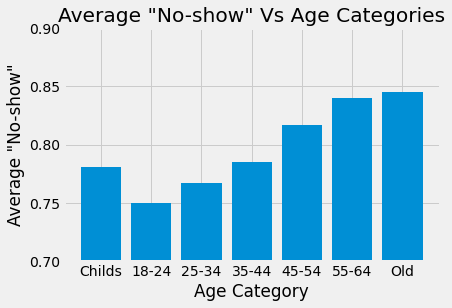

In [56]:
locations = [1,2,3,4,5,6,7]
heights = [mean_childs,mean_age_18,mean_age_25,mean_age_35,mean_age_45,mean_age_55,mean_old]
labels = ['Childs','18-24','25-34','35-44','45-54','55-64','Old']

plt.bar(locations,heights,tick_label = labels)
plt.title('Average "No-show" Vs Age Categories')
plt.ylim([0.7,0.9]) #to focus on this spot to feel the change
plt.xlabel('Age Category')
plt.ylabel('Average "No-show"')

Answer :
>- older patients are more committed to their appointments' scheduled than younger ones.

# Question 6  
>- Do patients who recieves SMS to remind them of the appointement more likely to show up

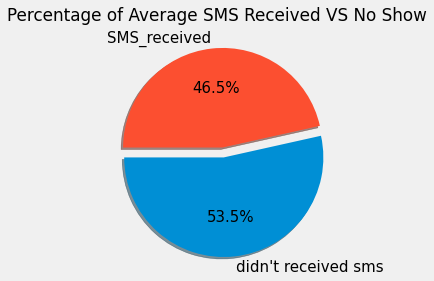

In [57]:
df.groupby(['SMS_received'])['No-show'].mean().plot(kind='pie',startangle=180,labels=["didn't received sms","SMS_received"],
                                                    explode=[0,0.1],autopct='%1.1f%%',shadow=True,textprops={'fontsize':15})
plt.suptitle('Percentage of Average SMS Received VS No Show')
plt.ylabel(None)
plt.axis('equal')
plt.show();

###### I thought that SMS would be effective.
>- we should ivestigate more on age recieving the SMS and ivestigate duration too.

childs

In [58]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']<18)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] <18)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 69.77, while 81.55  without SMS.


18-24

In [59]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=18) & (df['Age'] <= 24)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=18) & (df['Age'] <= 24)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 63.23, while 81.13  without SMS.


25-34

In [60]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=25) & (df['Age'] <= 34)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=25) & (df['Age'] <= 34)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 67.35, while 81.57  without SMS.


35-44

In [61]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=35) & (df['Age'] <= 44)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=35) & (df['Age'] <= 44)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 69.80, while 82.88  without SMS.


45-54

In [62]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=45) & (df['Age'] <= 54)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=45) & (df['Age'] <= 54)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 76.31, while 84.35  without SMS.


55-64

In [63]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=55) & (df['Age'] <= 64)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=55) & (df['Age'] <= 64)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 79.75, while 86.08  without SMS.


More than 65 (Old)

In [64]:
SMS_df = df.loc[(df['SMS_received'] == 1 ) & (df['Age']>=65)]['No-show'].mean()
SMS_No_df = df.loc[(df['SMS_received']== 0 ) & (df['Age'] >=65)]['No-show'].mean()

print(f'No-show percentage with SMS is {SMS_df*100:.2f}, while {SMS_No_df*100:.2f}  without SMS.')

No-show percentage with SMS is 80.31, while 86.34  without SMS.


##### Outcomes:
>- it seems like the percentage of Show ups increase with SMS with increasing age.

##### Answer:
>- percentage of Show ups increase with SMS with increasing age.
>- Percentage of patients who shows up increases when the duration is larger.
>- we can't be quiet sure of the answer because data doesn't mention the time of sending SMS! maybe this information will show more and may be need to be improved.

# Question 7
>- What is percentage of patients who diagnosed with Diabetes, Hipertension, Alcoholism, and Handcap

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handcap         110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

In [66]:
count = 110526 #number of data records

In [67]:
#percentage of people diagnosed with Diabetes
count_diabets = df[df['Diabetes']==1]['PatientId'].count()
print(f"Percentage of patients who diagnosed with Diabetes is {count_diabets*100/count:.2f}.")

Percentage of patients who diagnosed with Diabetes is 7.19.


In [68]:
#percentage of people diagnosed with Diabetes
count_diabets = df[df['Hipertension']==1]['PatientId'].count()
print(f"Percentage of patients who diagnosed with Hipertension is {count_diabets*100/count:.2f}.")

Percentage of patients who diagnosed with Hipertension is 19.72.


In [69]:
#percentage of people diagnosed with Diabetes
count_diabets = df[df['Handcap']==1]['PatientId'].count()
print(f"Percentage of patients who diagnosed with Handcap is {count_diabets*100/count:.2f}.")

Percentage of patients who diagnosed with Handcap is 1.85.


# Question 8
>- Is alcohol drinking may be a cause of missing out the appointements?

In [70]:
Alcoholism_show = df.loc[(df['Alcoholism'] == 1) & (df['No-show']==1)]['PatientId'].count()
Alcoholism_No_show = df.loc[(df['Alcoholism'] == 1) & (df['No-show']==0)]['PatientId'].count()
print(f"Percentage of show ups when patients have alchoholism is {Alcoholism_show*100/count:.2f}%, while not show ups is {Alcoholism_No_show*100/count:.2f}%.")

Percentage of show ups when patients have alchoholism is 2.43%, while not show ups is 0.61%.


##### Answer:
>- it doesn't make them missing the appointments as most of them didn't miss theirs.